In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../data/classification/dataset.csv', index_col=[0])
dataset.shape

(47, 295)

In [3]:
dataset.head()

,sampleID,time,vegetable,950,952,954,956,958,960,962,...,1514,1516,1518,1520,1522,1524,1526,1528,1530,target
0,0,2018-08-15 10:22:29,NaN,-7.154161,-7.098956,-7.065396,-7.063221,-7.040813,-6.971343,-6.950519,...,-3.976234,-3.947874,-3.933227,-3.905569,-3.889601,-3.870389,-3.842720,-3.817449,-3.801313,Unknown
1,0,2018-08-15 10:23:16,NaN,-7.458031,-7.397309,-7.354549,-7.344484,-7.315165,-7.239931,-7.212055,...,-3.986469,-3.957012,-3.942055,-3.913573,-3.898037,-3.879128,-3.850580,-3.823837,-3.800456,Unknown
2,0,2018-08-15 10:27:53,NaN,1.241622,1.129873,1.004856,0.869179,0.770919,0.740722,0.686860,...,-1.080030,-1.070789,-1.079004,-1.070775,-1.073079,-1.073059,-1.065096,-1.063651,-1.061178,Water - No Mask
3,0,2018-08-15 10:29:26,NaN,2.650057,2.471409,2.278431,2.084272,1.934799,1.862054,1.772767,...,-1.096729,-1.088533,-1.096279,-1.087548,-1.090942,-1.087388,-1.072598,-1.064524,-1.063713,Water - Mask
4,0,2018-08-15 10:30:53,NaN,11.867105,11.034720,10.213509,9.464375,8.834002,8.377041,8.022117,...,1.073932,1.104430,1.116346,1.143269,1.160658,1.186514,1.224935,1.255239,1.284156,Pedialite


In [4]:
dataset.drop(['sampleID', 'vegetable'], inplace = True, axis=1)
dataset.shape

(47, 293)

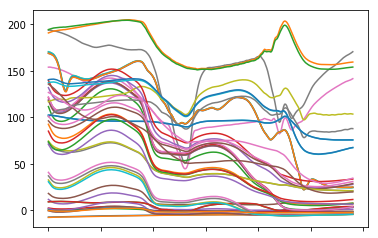

In [5]:
#subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
dataset[[str(x) for x in range(950, 1530+1,2)]].T.plot(legend=False)

In [6]:
dataset['target']

0                           Unknown
1                           Unknown
2                   Water - No Mask
3                      Water - Mask
4                         Pedialite
5                         Pedialite
6                         Olive Oil
7                         Olive Oil
8                    Sugar - Static
9                    Sugar - Static
10                   Sugar - Static
11                   Sugar - Static
12                       Canola Oil
13                       Canola Oil
14               Dishwashing produc
15               Dishwashing produc
16                Bubbles - No Mask
17                Bubbles - No Mask
18                   Bubbles - Mask
19                   Bubbles - Mask
20                          Vinegar
21                          Vinegar
22                      Basil leafs
23                      Basil leafs
24                      Basil leafs
25             Basil Leafs - Moving
26             Basil Leafs - Moving
27                   Dark Ch

In [7]:
dataset = dataset[dataset['target'] != 'Unknown']
dataset.shape

(45, 293)

In [8]:
# Target cleaning
dataset.replace(to_replace='Water - No Mask', value='Water', inplace=True)
dataset.replace(to_replace='Water - Mask', value='Water', inplace=True)
dataset.replace(to_replace='Pedialite', value='Water', inplace=True)

dataset.replace(to_replace='Frozen Peas', value='Peas', inplace=True)
dataset.replace(to_replace='Cooked Peas', value='Peas', inplace=True)

dataset.replace(to_replace='Peach no skin', value='Peach', inplace=True)
dataset.replace(to_replace='Peach skin Moving', value='Peach', inplace=True)
dataset.replace(to_replace='Peach skin Moving', value='Peach', inplace=True)

dataset.replace(to_replace='Basil Leafs - Dry - scrambled', value='Basil', inplace=True)
dataset.replace(to_replace='Basil Leafs - Dry - Whole', value='Basil', inplace=True)
dataset.replace(to_replace='Basil Leafs - Moving', value='Basil', inplace=True)
dataset.replace(to_replace='Basil leafs', value='Basil', inplace=True)

dataset.replace(to_replace='Bubbles - No Mask', value='Bubbles', inplace=True)
dataset.replace(to_replace='Bubbles - Mask', value='Bubbles', inplace=True)

In [9]:
dataset['target']

2                  Water
3                  Water
4                  Water
5                  Water
6              Olive Oil
7              Olive Oil
8         Sugar - Static
9         Sugar - Static
10        Sugar - Static
11        Sugar - Static
12            Canola Oil
13            Canola Oil
14    Dishwashing produc
15    Dishwashing produc
16               Bubbles
17               Bubbles
18               Bubbles
19               Bubbles
20               Vinegar
21               Vinegar
22                 Basil
23                 Basil
24                 Basil
25                 Basil
26                 Basil
27        Dark Chocolate
28        Dark Chocolate
29                 Basil
30                 Basil
31                 Basil
32                 Basil
33        Yogurt Vanilla
34        Yogurt Vanilla
35                 Peach
36                 Peach
37                 Peach
38                 Peach
39              Bretzels
40              Bretzels
41                  Peas


# Classification

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

# Data preparation

In [11]:
X = dataset[[str(x) for x in range(950, 1530+1,2)]]
y = dataset['target']

In [12]:
# Label preparation
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ycode = le.fit_transform(y)

# Blocs creation

In [13]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    
    def __init__(self, params={},):
        self.params = params
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.apply(lambda x:savgol_filter(x, **self.params), axis=1)
        return pd.DataFrame(list(df), index=X.index, columns=X.columns)
    
savgol = Savgol(params={'window_length':5, 'polyorder':2, 'deriv':0})
savgol.fit_transform(X).shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(45, 291)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
from sklearn.decomposition import PCA
pca = PCA()

# Tree construction

In [16]:
savgol0 = Savgol(params={'window_length':7, 'polyorder':2, 'deriv':0})
savgol1 = Savgol(params={'window_length':7, 'polyorder':2, 'deriv':1})
savgol2 = Savgol(params={'window_length':9, 'polyorder':2, 'deriv':2})

In [17]:
# Approach 1

union1 = make_union(#Pipeline([('savgol0', savgol0), ('scaler', StandardScaler()), ('pca', PCA())]), 
                   Pipeline([('savgol1', savgol1), ('scaler1', StandardScaler()), ('pca1', PCA())]), 
                   Pipeline([('savgol2', savgol2), ('scaler2', StandardScaler()), ('pca2', PCA())]), )

#
Xtrf = union1.fit_transform(X)
Xtrf.shape



/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(45, 90)

In [23]:
# Approach 2

union2 = make_union(#savgol0,
                   savgol1,
                   savgol2)
pipe2 = Pipeline([('union', union2), ('scaler', StandardScaler()), ('pca', PCA())])
Xtrf = pipe2.fit_transform(X)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [184]:
# Approach 3

pipe3 = Pipeline([('savgol', savgol1), ('scaler', StandardScaler()), ('pca', PCA())])
Xtrf = pipe3.fit_transform(X)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


# Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7,
                             n_estimators=1000, random_state=0)

In [40]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, Xtrf, ycode, cv=3)

y_pred.shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


(45,)

In [41]:
from sklearn.metrics import f1_score
f1_score(ycode, y_pred, average='micro') 

0.5111111111111111

In [42]:
for true,pred in zip(y,le.inverse_transform(y_pred)):
    print(true, ' <-> ', pred)

Water  <->  Basil
Water  <->  Basil
Water  <->  Water
Water  <->  Peas
Olive Oil  <->  Basil
Olive Oil  <->  Basil
Sugar - Static  <->  Sugar - Static
Sugar - Static  <->  Sugar - Static
Sugar - Static  <->  Sugar - Static
Sugar - Static  <->  Sugar - Static
Canola Oil  <->  Basil
Canola Oil  <->  Peas
Dishwashing produc  <->  Peas
Dishwashing produc  <->  Water
Bubbles  <->  Basil
Bubbles  <->  Bubbles
Bubbles  <->  Bubbles
Bubbles  <->  Bubbles
Vinegar  <->  Vinegar
Vinegar  <->  Vinegar
Basil  <->  Basil
Basil  <->  Basil
Basil  <->  Basil
Basil  <->  Basil
Basil  <->  Basil
Dark Chocolate  <->  Basil
Dark Chocolate  <->  Basil
Basil  <->  Basil
Basil  <->  Basil
Basil  <->  Olive Oil
Basil  <->  Peach
Yogurt Vanilla  <->  Basil
Yogurt Vanilla  <->  Peas
Peach  <->  Basil
Peach  <->  Basil
Peach  <->  Peach
Peach  <->  Peach
Bretzels  <->  Peas
Bretzels  <->  Peas
Peas  <->  Peas
Peas  <->  Peas
Peas  <->  Peas
Peas  <->  Peas
Peas  <->  Peach
Peas  <->  Basil


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization


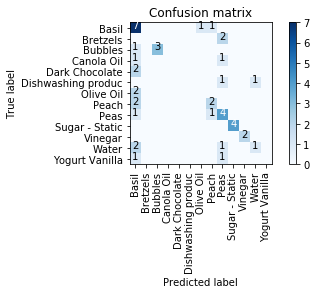

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(ycode, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90) #
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] != 0:
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cnf_matrix, classes=le.classes_, title='Confusion matrix')

In [134]:
le.classes_

array(['Basil', 'Bretzels', 'Bubbles - Mask', 'Bubbles - No Mask',
       'Canola Oil', 'Dark Chocolate', 'Dishwashing produc', 'Olive Oil',
       'Peach', 'Peas', 'Sugar - Static', 'Vinegar', 'Water',
       'Yogurt Vanilla'], dtype=object)